In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sbn
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20) #Change the value to display more rows.
plt.style.use('seaborn-v0_8-darkgrid')

#Importing dataset

In [55]:
assay = pd.read_excel(r"C:\Users\USER\Desktop\Data Nikel\Excel\ASSAY.xlsx", sheet_name = 'ASSAY')
lithology = pd.read_excel(r"C:\Users\USER\Desktop\Data Nikel\Excel\LITHOLOGY.xlsx", sheet_name = 'LITOLOGI')

#Merging tables

In [3]:
#Each BHID has interval of Assay sample taken and reconciled with lithology
df1= assay.merge(lithology, how = 'inner', on = ['BHID','DEPTH_FROM','DEPTH_TO'])
df1.set_index('BHID')

,DEPTH_FROM,DEPTH_TO,INTERVAL,Ni,Co,Fe,SiO2,MgO,SAMID,THICKNESS,LIT
BHID,,,,,,,,,,,
DHP001,0.00,1.00,1.00,0.50,0.05,46.20,2.40,1.50,DHP001_1,1.00,WASTE
DHP001,1.00,2.00,1.00,0.72,0.05,44.40,2.60,1.60,DHP001_2,1.00,WASTE
DHP001,2.00,3.00,1.00,0.89,0.06,44.80,3.00,1.60,DHP001_3,1.00,WASTE
DHP001,3.00,4.00,1.00,0.98,0.07,45.40,2.70,1.30,DHP001_4,1.00,WASTE
DHP001,4.00,5.00,1.00,0.90,0.06,43.90,2.70,1.30,DHP001_5,1.00,WASTE
...,...,...,...,...,...,...,...,...,...,...,...
DHP125,10.00,10.85,0.85,1.11,0.14,42.60,17.00,3.70,DHP125_10.85,0.85,WASTE
DHP125,10.85,11.00,0.15,0.69,0.04,6.50,42.10,34.80,DHP125_11,0.15,BZ
DHP125,11.00,12.00,1.00,0.95,0.06,8.22,40.26,33.58,DHP125_12,1.00,BZ


#The company wanted to review how much samples were sent by each of borehole

In [106]:
#Each samples were taken from boreholes and the lithologies it classified into
group_by_bhid = df1.groupby(['BHID','LIT'])
group_by_bhid[['SAMID','INTERVAL']].count()

SAMID  INTERVAL
BHID   LIT                   
DHP001 BZ         5         5
       ORE        6         6
       WASTE     11        11
DHP002 BZ         5         5
       ORE       20        20
...             ...       ...
DHP123 WASTE      8         8
DHP124 ORE       13        13
       WASTE      8         8
DHP125 BZ         4         4
       WASTE     11        11

[357 rows x 2 columns]

In [37]:
#Count of samples that were sent to laboratory testing.
print(df1['SAMID'].count())

3205


#The company wanted to look deeper into the reconciliation results

In [79]:
#General overview of reconciliation
group_by_bhid[['Ni','Fe','Co','SiO2','MgO']].describe()

Ni                                                         \
             count      mean       std   min     25%    50%     75%   max   
BHID   LIT                                                                  
DHP001 BZ      5.0  0.620000  0.227706  0.32  0.5200  0.630  0.6900  0.94   
       ORE     6.0  1.601667  0.341726  1.03  1.5375  1.620  1.7175  2.08   
       WASTE  11.0  0.922727  0.238373  0.50  0.8550  0.930  0.9700  1.49   
DHP002 BZ      5.0  0.548000  0.198293  0.42  0.4600  0.480  0.4800  0.90   
       ORE    20.0  2.294000  0.503529  1.38  1.8950  2.345  2.7925  3.07   
...            ...       ...       ...   ...     ...    ...     ...   ...   
DHP123 WASTE   8.0  0.872500  0.194551  0.58  0.7225  0.900  1.0125  1.14   
DHP124 ORE    13.0  2.116923  0.477744  1.16  1.9000  2.080  2.3700  2.93   
       WASTE   8.0  0.987500  0.222951  0.72  0.8175  0.975  1.1625  1.27   
DHP125 BZ      4.0  0.607500  0.267379  0.39  0.3975  0.545  0.7550  0.95   
       WASTE  11.0  0.964545  0.104820  0.80  0.9150  0.970  1.0200  1.12   

                Fe                                                        \
             count       mean       std    min      25%     50%      75%   
BHID   LIT                                                                 
DHP001 BZ      5.0   5.626000  0.191911   5.40   5.4700   5.630   5.8000   
       ORE     6.0  14.518333  7.204183   6.14   8.3775  15.285  18.9150   
       WASTE  11.0  41.400000  4.690416  31.50  38.3500  43.900  44.6000   
DHP002 BZ      5.0   7.254000  0.801205   6.30   7.0700   7.110   7.2700   
       ORE    20.0  15.208000  8.047532   5.85   9.6725  12.400  18.5500   
...            ...        ...       ...    ...      ...     ...      ...   
DHP123 WASTE   8.0  41.000000  3.360272  37.10  38.6250  39.950  43.1750   
DHP124 ORE    13.0  12.770769  5.773952   6.40   7.4300  11.600  18.4000   
       WASTE   8.0  43.075000  3.760984  37.50  40.3500  43.400  46.2750   
DHP125 BZ      4.0   6.992500  0.831440   6.46   6.4900   6.645   7.1475   
       WASTE  11.0  47.227273  2.182701  42.60  46.1500  47.500  48.7000   

                       Co                                                  \
                max count      mean       std   min    25%    50%     75%   
BHID   LIT                                                                  
DHP001 BZ      5.83   5.0  0.004000  0.005477  0.00  0.000  0.000  0.0100   
       ORE    24.20   6.0  0.060000  0.040988  0.01  0.025  0.075  0.0800   
       WASTE  46.20  11.0  0.070000  0.017889  0.05  0.060  0.070  0.0750   
DHP002 BZ      8.52   5.0  0.010000  0.000000  0.01  0.010  0.010  0.0100   
       ORE    37.50  20.0  0.059000  0.055810  0.01  0.020  0.040  0.0675   
...             ...   ...       ...       ...   ...    ...    ...     ...   
DHP123 WASTE  46.20   8.0  0.017500  0.007071  0.01  0.010  0.020  0.0200   
DHP124 ORE    22.60  13.0  0.036154  0.032285  0.01  0.010  0.030  0.0400   
       WASTE  47.20   8.0  0.052500  0.084134  0.01  0.020  0.025  0.0300   
DHP125 BZ      8.22   4.0  0.035000  0.019149  0.02  0.020  0.030  0.0450   
       WASTE  50.70  11.0  0.048182  0.034005  0.03  0.030  0.030  0.0450   

                    SiO2                                                       \
               max count       mean       std    min      25%    50%      75%   
BHID   LIT                                                                      
DHP001 BZ     0.01   5.0  41.122000  1.816100  38.36  40.2600  41.80  42.4900   
       ORE    0.11   6.0  34.255000  6.357222  23.70  32.2275  34.68  37.7625   
       WASTE  0.11  11.0   7.718182  6.407935   2.40   2.7000   3.30  12.7000   
DHP002 BZ     0.01   5.0  35.088000  0.768290  34.44  34.5400  34.61  35.8500   
       ORE    0.23  20.0  33.218000  8.168659  11.40  31.8400  35.59  38.8850   
...            ...   ...        ...       ...    ...      ...    ...      ...   
DHP123 WASTE  0.03   8.0   2.637500  0.805228   1.60   2.1250   

In [116]:
#Looking into each assay results by each of borehole.
group_by_samid = df1.groupby(['BHID','SAMID'])
group_by_samid[['Ni','Fe','Co','SiO2', 'MgO']].mean()

Ni     Fe    Co   SiO2    MgO
BHID   SAMID                                     
DHP001 DHP001_1   0.50  46.20  0.05   2.40   1.50
       DHP001_10  0.93  38.80  0.08  10.80   1.80
       DHP001_11  1.49  31.50  0.09  18.70   9.30
       DHP001_12  1.65  24.20  0.08  23.70  12.00
       DHP001_13  2.08  14.01  0.11  35.55  22.67
...                ...    ...   ...    ...    ...
DHP125 DHP125_5   1.04  46.60  0.03   1.60   0.20
       DHP125_6   0.81  46.70  0.03   1.60   0.40
       DHP125_7   1.00  45.40  0.05   1.80   0.60
       DHP125_8   0.94  45.70  0.04   2.70   0.60
       DHP125_9   0.95  50.70  0.04   3.80   0.30

[3205 rows x 5 columns]

array([[<Axes: title={'center': 'Co'}>, <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'MgO'}>, <Axes: title={'center': 'Ni'}>],
       [<Axes: title={'center': 'SiO2'}>, <Axes: >]], dtype=object)

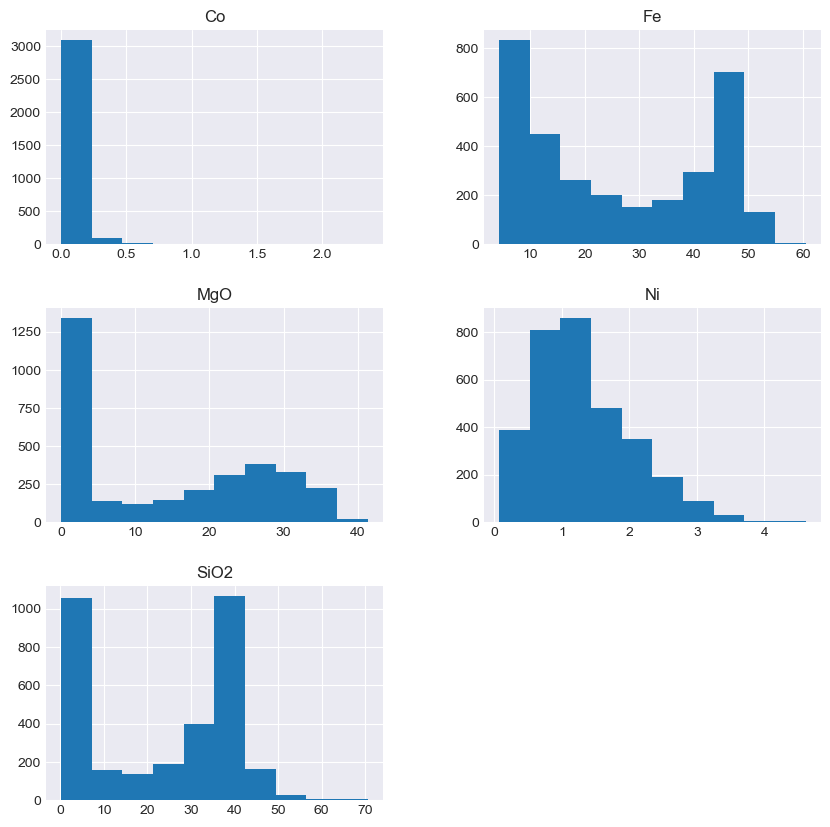

In [40]:
#Histogram to shows general overview of data distribution
exclude = ['DEPTH_FROM','DEPTH_TO', 'THICKNESS', 'INTERVAL', 'SAMID', 'BHID', 'LIT']
df1.loc[:, df1.columns.difference(exclude)].hist(figsize = [10,10], bins = 10) 

In [30]:
#Looking only at average value of assay results by each borehole.
group_by_bhid[['Ni','Fe','Co','SiO2','MgO']].mean()

Ni         Fe        Co       SiO2        MgO
BHID   LIT                                                       
DHP001 BZ     0.620000   5.626000  0.004000  41.122000  26.036000
       ORE    1.601667  14.518333  0.060000  34.255000  21.266667
       WASTE  0.922727  41.400000  0.070000   7.718182   2.218182
DHP002 BZ     0.548000   7.254000  0.010000  35.088000  24.490000
       ORE    2.294000  15.208000  0.059000  33.218000  18.767500
...                ...        ...       ...        ...        ...
DHP123 WASTE  0.872500  41.000000  0.017500   2.637500   1.362500
DHP124 ORE    2.116923  12.770769  0.036154  38.638462  24.584615
       WASTE  0.987500  43.075000  0.052500   2.750000   0.937500
DHP125 BZ     0.607500   6.992500  0.035000  40.590000  35.200000
       WASTE  0.964545  47.227273  0.048182   4.000000   0.800000

[357 rows x 5 columns]

In [130]:
#Average, maximum, and minimum value of Ni across all lithologies.
df1.groupby('LIT').agg({'Ni':['mean','max','min']})

Ni            
           mean   max   min
LIT                        
BZ     0.770867  1.98  0.19
ORE    2.028557  4.61  0.44
WASTE  0.913833  4.28  0.07

#Company wanted to split the data by Ni of 1.5 up and 1.5 down

In [127]:
#Samples with Ni < 1.5
df1.loc[df1['Ni'] < 1.5].sort_values(by=['BHID'],ascending=[True])

,BHID,DEPTH_FROM,DEPTH_TO,INTERVAL,Ni,Co,Fe,SiO2,MgO,SAMID,THICKNESS,LIT
0,DHP001,0.0,1.0,1.0,0.50,0.05,46.20,2.40,1.50,DHP001_1,1.0,WASTE
21,DHP001,19.0,20.0,1.0,0.32,0.00,5.63,40.26,28.88,DHP001_20,1.0,BZ
20,DHP001,18.0,19.0,1.0,0.52,0.01,5.80,41.80,23.63,DHP001_19,1.0,BZ
19,DHP001,17.4,18.0,0.6,0.69,0.00,5.40,42.70,23.47,DHP001_18,0.6,BZ
18,DHP001,17.0,17.4,0.4,0.63,0.01,5.83,38.36,29.94,DHP001_17.4,0.4,BZ
...,...,...,...,...,...,...,...,...,...,...,...,...
3192,DHP125,2.0,3.0,1.0,0.89,0.03,48.00,1.80,0.60,DHP125_3,1.0,WASTE
3191,DHP125,1.0,2.0,1.0,0.98,0.03,48.90,1.70,0.30,DHP125_2,1.0,WASTE
3203,DHP125,12.0,13.0,1.0,0.40,0.02,6.79,40.00,35.63,DHP125_13,1.0,BZ
3196,DHP125,6.0,7.0,1.0,1.00,0.05,45.40,1.80,0.60,DHP125_7,1.0,WASTE


In [128]:
#Samples with Ni > 1.5
df1.loc[df1['Ni'] > 1.5].sort_values(by=['BHID'],ascending=[True])

,BHID,DEPTH_FROM,DEPTH_TO,INTERVAL,Ni,Co,Fe,SiO2,MgO,SAMID,THICKNESS,LIT
11,DHP001,11.00,12.00,1.00,1.65,0.08,24.20,23.70,12.00,DHP001_12,1.00,ORE
12,DHP001,12.00,13.00,1.00,2.08,0.11,14.01,35.55,22.67,DHP001_13,1.00,ORE
13,DHP001,13.00,14.00,1.00,1.59,0.07,16.56,33.81,19.76,DHP001_14,1.00,ORE
14,DHP001,14.00,14.75,0.75,1.74,0.08,19.70,31.70,16.50,DHP001_14.75,0.75,ORE
16,DHP001,15.00,16.00,1.00,1.52,0.01,6.14,42.27,27.47,DHP001_16,1.00,ORE
...,...,...,...,...,...,...,...,...,...,...,...,...
3179,DHP124,9.28,10.00,0.72,2.53,0.04,19.60,33.90,17.20,DHP124_10,0.72,ORE
3178,DHP124,9.00,9.28,0.28,1.89,0.03,10.49,39.99,27.87,DHP124_9.28,0.28,ORE
3177,DHP124,8.00,9.00,1.00,2.04,0.12,22.60,32.40,15.00,DHP124_9,1.00,ORE
3181,DHP124,11.00,12.00,1.00,2.08,0.05,19.30,37.30,16.50,DHP124_12,1.00,ORE


Where is the highest Ni value of all samples?

In [129]:
df1.sort_values(by=['Ni'],ascending=[False])
#DHP075 between 14.0 and 14.75 shows the highest Ni

,BHID,DEPTH_FROM,DEPTH_TO,INTERVAL,Ni,Co,Fe,SiO2,MgO,SAMID,THICKNESS,LIT
1912,DHP075,14.0,14.75,0.75,4.61,0.20,10.10,39.5,23.10,DHP075_14.75,0.75,ORE
818,DHP032,7.0,8.00,1.00,4.28,0.18,12.90,34.1,23.20,DHP032_8,1.00,WASTE
2649,DHP101,12.0,13.00,1.00,4.18,2.35,30.40,12.3,3.10,DHP101_13,1.00,ORE
860,DHP033,24.6,25.00,0.40,3.93,0.22,17.40,33.2,20.00,DHP033_25,0.40,ORE
1364,DHP052,14.0,14.35,0.35,3.93,0.12,11.28,37.9,26.74,DHP052_14.35,0.35,ORE
...,...,...,...,...,...,...,...,...,...,...,...,...
1701,DHP067,0.0,1.00,1.00,0.13,0.00,23.50,1.3,0.60,DHP067_1,1.00,WASTE
2136,DHP083,2.0,3.00,1.00,0.13,0.01,13.30,0.8,0.05,DHP083_3,1.00,WASTE
1702,DHP067,1.0,2.00,1.00,0.12,0.01,23.90,1.1,0.40,DHP067_2,1.00,WASTE
1704,DHP067,3.0,4.00,1.00,0.11,0.03,20.30,5.3,0.30,DHP067_4,1.00,WASTE
